In [2]:
import os,cv2,keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import hub
import tensorflow as tf

C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\check_latest_version.py:32: UserWarning: A newer version of hub (3.0.0) is available. It's recommended that you update to the latest version using `pip install -U hub`.
  warnings.warn(


In [3]:
ds = hub.load("hub://activeloop/carpk-train")
dataloader = ds.tensorflow()
images = ds.tensors['images']
boxes = ds['boxes'].numpy(aslist=True)

hub://activeloop/carpk-train loaded successfully.
This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/carpk-train


In [4]:

cv2.setUseOptimized(True);
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

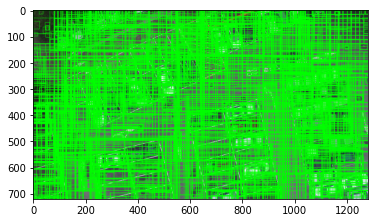

In [5]:
im = np.array(images[2].numpy(aslist=True))
ss.setBaseImage(im)
ss.switchToSelectiveSearchFast()
rects = ss.process()
imOut = im.copy()
for i, rect in (enumerate(rects)):
    x, y, w, h = rect
#     print(x,y,w,h)
#     imOut = imOut[x:x+w,y:y+h]
    cv2.rectangle(imOut, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
# plt.figure()
plt.imshow(imOut)

In [6]:
train_images=[]
train_labels=[]

In [7]:
def get_iou(bb1, bb2):
    assert bb1['x1'] < bb1['x2']
    assert bb1['y1'] < bb1['y2']
    assert bb2['x1'] < bb2['x2']
    assert bb2['y1'] < bb2['y2']

    x_left = max(bb1['x1'], bb2['x1'])
    y_top = max(bb1['y1'], bb2['y1'])
    x_right = min(bb1['x2'], bb2['x2'])
    y_bottom = min(bb1['y2'], bb2['y2'])

    if x_right < x_left or y_bottom < y_top:
        return 0.0

    intersection_area = (x_right - x_left) * (y_bottom - y_top)

    bb1_area = (bb1['x2'] - bb1['x1']) * (bb1['y2'] - bb1['y1'])
    bb2_area = (bb2['x2'] - bb2['x1']) * (bb2['y2'] - bb2['y1'])

    iou = intersection_area / float(bb1_area + bb2_area - intersection_area)
    assert iou >= 0.0
    assert iou <= 1.0
    return iou

In [17]:
count = 0

for i in range(len(images[:30])):
    count += len(boxes[i])
    
print(count)

1382


In [21]:
count = 0
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
for i in range(len(images)):
    for j in boxes[i]:
        
        try:
                count +=1
                print(count)
                image = np.array(images[i].numpy(aslist=True))
              
                gtvalues=[]
               
                
                x1 = int(j[0])
                y1 = int(j[1])
                x2 = int(j[2])
                y2 = int(j[3])
               
                gtvalues.append({"x1":x1,"x2":x2,"y1":y1,"y2":y2})
                
                
                ss.setBaseImage(image)
                ss.switchToSelectiveSearchFast()
                ssresults = ss.process()
                imout = image.copy()
                counter = 0
                falsecounter = 0
                flag = 0
                fflag = 0
                bflag = 0
                for e,result in enumerate(ssresults):
                    if e < 2000 and flag == 0:
                        for gtval in gtvalues:
                            x,y,w,h = result
                            iou = get_iou(gtval,{"x1":x,"x2":x+w,"y1":y,"y2":y+h})
                            if counter < 30:
                                if iou > 0.70:
                                    timage = imout[y:y+h,x:x+w]
                                    resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                                    train_images.append(resized)
                                    train_labels.append(1)
                                    counter += 1
                            else :
                                fflag =1
                            if falsecounter <30:
                                if iou < 0.3:
                                    timage = imout[y:y+h,x:x+w]
                                    resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                                    train_images.append(resized)
                                    train_labels.append(0)
                                    falsecounter += 1
                            else :
                                bflag = 1
                        if fflag == 1 and bflag == 1:
                            print("inside")
                            flag = 1
        except Exception as e:
            print(e)
           

1

2

3

4

5

6

7

8

9

10

11

12

13

14

15

16

17

18

19

20

21

22

23

24

25

26

27

28

29

30

31

32

33

34

35

36

37

38

39

40

41

42

43

44

45

46

47

48

49

50

51

52

53

54

55

56

57

58

59

60

61

62

63

64

65

66

67

68
69

70

71

72

73

74

75

76

77

78

79

80

81

82

83

84

85

86

87

88

89

90

91

92

93

94

95

96

97

98

99

100

101

102

103

104

105

106

107

108

109

110

111

112

113

114

115

116

117

118

119

120

121

122

123

124

125

126

127

128

129

130

131

132

133

134

135

136

137

138

139

140

141

142

143

144

145

146

147

148

149

150

151

152
153

154

155

156

157

158

159

160

161

162

163

164

165

166

167

168

169

170

171

172

173

174

175

176

177

178

179

180

181

182

183

184

185

186

187

188

189

190

191

192

193

194

195

196

197

198

199

200

201

202

203

204

205

206

207

208

209

210

211

212

213

214

215

216

217

218

219

220

221

222



C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 1 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 2 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 3 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 4 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 5 out of 5
  warnings.warn(*args, **kwargs)


Could not connect to the endpoint URL: "https://s3.us-east-1.wasabisys.com/snark-hub/protected/activeloop/carpk-train/images/chunks/1bbf79b4"
428


C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 1 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 2 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 3 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 4 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 5 out of 5
  warnings.warn(*args, **kwargs)


Could not connect to the endpoint URL: "https://s3.us-east-1.wasabisys.com/snark-hub/protected/activeloop/carpk-train/images/chunks/1bbf79b4"
429


C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 1 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 2 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 3 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 4 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 5 out of 5
  warnings.warn(*args, **kwargs)


Could not connect to the endpoint URL: "https://s3.us-east-1.wasabisys.com/snark-hub/protected/activeloop/carpk-train/images/chunks/1bbf79b4"
430


C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 1 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 2 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 3 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 4 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 5 out of 5
  warnings.warn(*args, **kwargs)


Could not connect to the endpoint URL: "https://s3.us-east-1.wasabisys.com/snark-hub/protected/activeloop/carpk-train/images/chunks/1bbf79b4"
431


C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 1 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 2 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 3 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 4 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 5 out of 5
  warnings.warn(*args, **kwargs)


Could not connect to the endpoint URL: "https://s3.us-east-1.wasabisys.com/snark-hub/protected/activeloop/carpk-train/images/chunks/1bbf79b4"
432


C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 1 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 2 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 3 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 4 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 5 out of 5
  warnings.warn(*args, **kwargs)


Could not connect to the endpoint URL: "https://s3.us-east-1.wasabisys.com/snark-hub/protected/activeloop/carpk-train/images/chunks/1bbf79b4"
433


C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 1 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 2 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 3 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 4 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 5 out of 5
  warnings.warn(*args, **kwargs)


Could not connect to the endpoint URL: "https://s3.us-east-1.wasabisys.com/snark-hub/protected/activeloop/carpk-train/images/chunks/1bbf79b4"
434


C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 1 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 2 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 3 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 4 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 5 out of 5
  warnings.warn(*args, **kwargs)


Could not connect to the endpoint URL: "https://s3.us-east-1.wasabisys.com/snark-hub/protected/activeloop/carpk-train/images/chunks/1bbf79b4"
435


C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 1 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 2 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 3 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 4 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 5 out of 5
  warnings.warn(*args, **kwargs)


Could not connect to the endpoint URL: "https://s3.us-east-1.wasabisys.com/snark-hub/protected/activeloop/carpk-train/images/chunks/1bbf79b4"
436


C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 1 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 2 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 3 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 4 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 5 out of 5
  warnings.warn(*args, **kwargs)


Could not connect to the endpoint URL: "https://s3.us-east-1.wasabisys.com/snark-hub/protected/activeloop/carpk-train/images/chunks/1bbf79b4"
437


C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 1 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 2 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 3 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 4 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 5 out of 5
  warnings.warn(*args, **kwargs)


Could not connect to the endpoint URL: "https://s3.us-east-1.wasabisys.com/snark-hub/protected/activeloop/carpk-train/images/chunks/1bbf79b4"
438


C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 1 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 2 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 3 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 4 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 5 out of 5
  warnings.warn(*args, **kwargs)


Could not connect to the endpoint URL: "https://s3.us-east-1.wasabisys.com/snark-hub/protected/activeloop/carpk-train/images/chunks/1bbf79b4"
439


C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 1 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 2 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 3 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 4 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 5 out of 5
  warnings.warn(*args, **kwargs)


Could not connect to the endpoint URL: "https://s3.us-east-1.wasabisys.com/snark-hub/protected/activeloop/carpk-train/images/chunks/1bbf79b4"
440


C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 1 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 2 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 3 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 4 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 5 out of 5
  warnings.warn(*args, **kwargs)


Could not connect to the endpoint URL: "https://s3.us-east-1.wasabisys.com/snark-hub/protected/activeloop/carpk-train/images/chunks/1bbf79b4"
441


C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 1 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 2 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 3 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 4 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 5 out of 5
  warnings.warn(*args, **kwargs)


Could not connect to the endpoint URL: "https://s3.us-east-1.wasabisys.com/snark-hub/protected/activeloop/carpk-train/images/chunks/1bbf79b4"
442


C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 1 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 2 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 3 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 4 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 5 out of 5
  warnings.warn(*args, **kwargs)


Could not connect to the endpoint URL: "https://s3.us-east-1.wasabisys.com/snark-hub/protected/activeloop/carpk-train/images/chunks/1bbf79b4"
443


C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 1 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 2 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 3 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 4 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 5 out of 5
  warnings.warn(*args, **kwargs)


Could not connect to the endpoint URL: "https://s3.us-east-1.wasabisys.com/snark-hub/protected/activeloop/carpk-train/images/chunks/1bbf79b4"
444


C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 1 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 2 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 3 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 4 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 5 out of 5
  warnings.warn(*args, **kwargs)


Could not connect to the endpoint URL: "https://s3.us-east-1.wasabisys.com/snark-hub/protected/activeloop/carpk-train/images/chunks/1bbf79b4"
445


C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 1 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 2 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 3 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 4 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 5 out of 5
  warnings.warn(*args, **kwargs)


Could not connect to the endpoint URL: "https://s3.us-east-1.wasabisys.com/snark-hub/protected/activeloop/carpk-train/images/chunks/1bbf79b4"
446


C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 1 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 2 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 3 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 4 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 5 out of 5
  warnings.warn(*args, **kwargs)


Could not connect to the endpoint URL: "https://s3.us-east-1.wasabisys.com/snark-hub/protected/activeloop/carpk-train/images/chunks/1bbf79b4"
447


C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 1 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 2 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 3 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 4 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 5 out of 5
  warnings.warn(*args, **kwargs)


Could not connect to the endpoint URL: "https://s3.us-east-1.wasabisys.com/snark-hub/protected/activeloop/carpk-train/images/chunks/1bbf79b4"
448


C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 1 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 2 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 3 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 4 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 5 out of 5
  warnings.warn(*args, **kwargs)


Could not connect to the endpoint URL: "https://s3.us-east-1.wasabisys.com/snark-hub/protected/activeloop/carpk-train/images/chunks/1bbf79b4"
449


C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 1 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 2 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 3 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 4 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 5 out of 5
  warnings.warn(*args, **kwargs)


Could not connect to the endpoint URL: "https://s3.us-east-1.wasabisys.com/snark-hub/protected/activeloop/carpk-train/images/chunks/1bbf79b4"
450


C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 1 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 2 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 3 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 4 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 5 out of 5
  warnings.warn(*args, **kwargs)


Could not connect to the endpoint URL: "https://s3.us-east-1.wasabisys.com/snark-hub/protected/activeloop/carpk-train/images/chunks/1bbf79b4"
451


C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 1 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 2 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 3 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 4 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 5 out of 5
  warnings.warn(*args, **kwargs)


Could not connect to the endpoint URL: "https://s3.us-east-1.wasabisys.com/snark-hub/protected/activeloop/carpk-train/images/chunks/1bbf79b4"
452


C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 1 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 2 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 3 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 4 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 5 out of 5
  warnings.warn(*args, **kwargs)


Could not connect to the endpoint URL: "https://s3.us-east-1.wasabisys.com/snark-hub/protected/activeloop/carpk-train/images/chunks/1bbf79b4"
453


C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 1 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 2 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 3 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 4 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 5 out of 5
  warnings.warn(*args, **kwargs)


Could not connect to the endpoint URL: "https://s3.us-east-1.wasabisys.com/snark-hub/protected/activeloop/carpk-train/images/chunks/1bbf79b4"
454


C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 1 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 2 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 3 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 4 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 5 out of 5
  warnings.warn(*args, **kwargs)


Could not connect to the endpoint URL: "https://s3.us-east-1.wasabisys.com/snark-hub/protected/activeloop/carpk-train/images/chunks/1bbf79b4"
455


C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 1 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 2 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 3 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 4 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 5 out of 5
  warnings.warn(*args, **kwargs)


Could not connect to the endpoint URL: "https://s3.us-east-1.wasabisys.com/snark-hub/protected/activeloop/carpk-train/images/chunks/1bbf79b4"
456


C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 1 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 2 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 3 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 4 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 5 out of 5
  warnings.warn(*args, **kwargs)


Could not connect to the endpoint URL: "https://s3.us-east-1.wasabisys.com/snark-hub/protected/activeloop/carpk-train/images/chunks/1bbf79b4"
457


C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 1 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 2 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 3 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 4 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 5 out of 5
  warnings.warn(*args, **kwargs)


Could not connect to the endpoint URL: "https://s3.us-east-1.wasabisys.com/snark-hub/protected/activeloop/carpk-train/images/chunks/1bbf79b4"
458


C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 1 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 2 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 3 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 4 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 5 out of 5
  warnings.warn(*args, **kwargs)


Could not connect to the endpoint URL: "https://s3.us-east-1.wasabisys.com/snark-hub/protected/activeloop/carpk-train/images/chunks/1bbf79b4"
459


C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 1 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 2 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 3 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 4 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 5 out of 5
  warnings.warn(*args, **kwargs)


Could not connect to the endpoint URL: "https://s3.us-east-1.wasabisys.com/snark-hub/protected/activeloop/carpk-train/images/chunks/1bbf79b4"
460


C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 1 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 2 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 3 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 4 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 5 out of 5
  warnings.warn(*args, **kwargs)


Could not connect to the endpoint URL: "https://s3.us-east-1.wasabisys.com/snark-hub/protected/activeloop/carpk-train/images/chunks/1bbf79b4"
461


C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 1 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 2 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 3 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 4 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 5 out of 5
  warnings.warn(*args, **kwargs)


Could not connect to the endpoint URL: "https://s3.us-east-1.wasabisys.com/snark-hub/protected/activeloop/carpk-train/images/chunks/1bbf79b4"
462


C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 1 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 2 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 3 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 4 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 5 out of 5
  warnings.warn(*args, **kwargs)


Could not connect to the endpoint URL: "https://s3.us-east-1.wasabisys.com/snark-hub/protected/activeloop/carpk-train/images/chunks/1bbf79b4"
463


C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 1 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 2 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 3 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 4 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 5 out of 5
  warnings.warn(*args, **kwargs)


Could not connect to the endpoint URL: "https://s3.us-east-1.wasabisys.com/snark-hub/protected/activeloop/carpk-train/images/chunks/1bbf79b4"
464


C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 1 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 2 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 3 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 4 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 5 out of 5
  warnings.warn(*args, **kwargs)


Could not connect to the endpoint URL: "https://s3.us-east-1.wasabisys.com/snark-hub/protected/activeloop/carpk-train/images/chunks/1bbf79b4"
465


C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 1 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 2 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 3 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 4 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 5 out of 5
  warnings.warn(*args, **kwargs)


Could not connect to the endpoint URL: "https://s3.us-east-1.wasabisys.com/snark-hub/protected/activeloop/carpk-train/images/chunks/1bbf79b4"
466


C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 1 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 2 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 3 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 4 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 5 out of 5
  warnings.warn(*args, **kwargs)


Could not connect to the endpoint URL: "https://s3.us-east-1.wasabisys.com/snark-hub/protected/activeloop/carpk-train/images/chunks/1bbf79b4"
467


C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 1 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 2 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 3 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 4 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 5 out of 5
  warnings.warn(*args, **kwargs)


Could not connect to the endpoint URL: "https://s3.us-east-1.wasabisys.com/snark-hub/protected/activeloop/carpk-train/images/chunks/1bbf79b4"
468


C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 1 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 2 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 3 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 4 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 5 out of 5
  warnings.warn(*args, **kwargs)


Could not connect to the endpoint URL: "https://s3.us-east-1.wasabisys.com/snark-hub/protected/activeloop/carpk-train/images/chunks/1bbf79b4"
469


C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 1 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 2 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 3 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 4 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 5 out of 5
  warnings.warn(*args, **kwargs)


Could not connect to the endpoint URL: "https://s3.us-east-1.wasabisys.com/snark-hub/protected/activeloop/carpk-train/images/chunks/1bbf79b4"
470


C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 1 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 2 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 3 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 4 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 5 out of 5
  warnings.warn(*args, **kwargs)


Could not connect to the endpoint URL: "https://s3.us-east-1.wasabisys.com/snark-hub/protected/activeloop/carpk-train/images/chunks/1bbf79b4"
471


C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 1 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 2 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 3 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 4 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 5 out of 5
  warnings.warn(*args, **kwargs)


Could not connect to the endpoint URL: "https://s3.us-east-1.wasabisys.com/snark-hub/protected/activeloop/carpk-train/images/chunks/1bbf79b4"
472


C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 1 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 2 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 3 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 4 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 5 out of 5
  warnings.warn(*args, **kwargs)


Could not connect to the endpoint URL: "https://s3.us-east-1.wasabisys.com/snark-hub/protected/activeloop/carpk-train/images/chunks/1bbf79b4"
473


C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 1 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 2 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 3 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 4 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 5 out of 5
  warnings.warn(*args, **kwargs)


Could not connect to the endpoint URL: "https://s3.us-east-1.wasabisys.com/snark-hub/protected/activeloop/carpk-train/images/chunks/1bbf79b4"
474


C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 1 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 2 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 3 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 4 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 5 out of 5
  warnings.warn(*args, **kwargs)


Could not connect to the endpoint URL: "https://s3.us-east-1.wasabisys.com/snark-hub/protected/activeloop/carpk-train/images/chunks/1bbf79b4"
475


C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 1 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 2 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 3 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 4 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 5 out of 5
  warnings.warn(*args, **kwargs)


Could not connect to the endpoint URL: "https://s3.us-east-1.wasabisys.com/snark-hub/protected/activeloop/carpk-train/images/chunks/1bbf79b4"
476


C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 1 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 2 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 3 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 4 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 5 out of 5
  warnings.warn(*args, **kwargs)


Could not connect to the endpoint URL: "https://s3.us-east-1.wasabisys.com/snark-hub/protected/activeloop/carpk-train/images/chunks/1bbf79b4"
477


C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 1 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 2 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 3 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 4 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 5 out of 5
  warnings.warn(*args, **kwargs)


Could not connect to the endpoint URL: "https://s3.us-east-1.wasabisys.com/snark-hub/protected/activeloop/carpk-train/images/chunks/1bbf79b4"
478


C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 1 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 2 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 3 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 4 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 5 out of 5
  warnings.warn(*args, **kwargs)


Could not connect to the endpoint URL: "https://s3.us-east-1.wasabisys.com/snark-hub/protected/activeloop/carpk-train/images/chunks/1bbf79b4"
479


C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 1 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 2 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 3 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 4 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 5 out of 5
  warnings.warn(*args, **kwargs)


Could not connect to the endpoint URL: "https://s3.us-east-1.wasabisys.com/snark-hub/protected/activeloop/carpk-train/images/chunks/1bbf79b4"
480


C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 1 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 2 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 3 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 4 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 5 out of 5
  warnings.warn(*args, **kwargs)


Could not connect to the endpoint URL: "https://s3.us-east-1.wasabisys.com/snark-hub/protected/activeloop/carpk-train/images/chunks/1bbf79b4"
481


C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 1 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 2 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 3 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 4 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 5 out of 5
  warnings.warn(*args, **kwargs)


Could not connect to the endpoint URL: "https://s3.us-east-1.wasabisys.com/snark-hub/protected/activeloop/carpk-train/images/chunks/1bbf79b4"
482


C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 1 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 2 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 3 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 4 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 5 out of 5
  warnings.warn(*args, **kwargs)


Could not connect to the endpoint URL: "https://s3.us-east-1.wasabisys.com/snark-hub/protected/activeloop/carpk-train/images/chunks/1bbf79b4"
483


C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 1 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 2 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 3 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 4 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 5 out of 5
  warnings.warn(*args, **kwargs)


Could not connect to the endpoint URL: "https://s3.us-east-1.wasabisys.com/snark-hub/protected/activeloop/carpk-train/images/chunks/1bbf79b4"
484


C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 1 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 2 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 3 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 4 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 5 out of 5
  warnings.warn(*args, **kwargs)


Could not connect to the endpoint URL: "https://s3.us-east-1.wasabisys.com/snark-hub/protected/activeloop/carpk-train/images/chunks/1bbf79b4"
485


C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 1 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 2 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 3 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 4 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 5 out of 5
  warnings.warn(*args, **kwargs)


Could not connect to the endpoint URL: "https://s3.us-east-1.wasabisys.com/snark-hub/protected/activeloop/carpk-train/images/chunks/1bbf79b4"
486


C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 1 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 2 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 3 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 4 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 5 out of 5
  warnings.warn(*args, **kwargs)


Could not connect to the endpoint URL: "https://s3.us-east-1.wasabisys.com/snark-hub/protected/activeloop/carpk-train/images/chunks/1bbf79b4"
487


C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 1 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 2 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 3 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 4 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 5 out of 5
  warnings.warn(*args, **kwargs)


Could not connect to the endpoint URL: "https://s3.us-east-1.wasabisys.com/snark-hub/protected/activeloop/carpk-train/images/chunks/1bbf79b4"
488


C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 1 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Connection re-established after 1 retry.
  warnings.warn(*args, **kwargs)



489

490

491

492

493

494

495

496

497

498

499

500

501

502

503

504

505

506

507

508

509

510

511

512

513

514

515

516

517

518

519

520

521

522

523

524

525

526

527

528

529

530

531

532

533

534

535

536

537

538

539

540

541

542

543

544

545

546

547

548

549

550

551

552

553

554

555

556

557

558

559

560

561

562

563

564

565

566

567

568

569

570

571

572

573

574

575

576

577

578

579

580

581

582

583

584

585

586

587

588

589

590

591

592

593

594

595

596

597

598

599

600

601

602

603

604

605

606

607

608

609

610

611

612

613

614

615

616

617

618

619

620

621

622

623

624

625

626

627

628

629

630

631

632

633

634

635

636

637

638

639

640

641

642

643

644

645

646

647

648

649

650

651

652

653

654
655


C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 1 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 2 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 3 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 4 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 5 out of 5
  warnings.warn(*args, **kwargs)


Could not connect to the endpoint URL: "https://s3.us-east-1.wasabisys.com/snark-hub/protected/activeloop/carpk-train/images/chunks/1bbf79b4"
656


C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 1 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 2 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 3 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 4 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 5 out of 5
  warnings.warn(*args, **kwargs)


Could not connect to the endpoint URL: "https://s3.us-east-1.wasabisys.com/snark-hub/protected/activeloop/carpk-train/images/chunks/1bbf79b4"
657


C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 1 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 2 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 3 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 4 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 5 out of 5
  warnings.warn(*args, **kwargs)


Could not connect to the endpoint URL: "https://s3.us-east-1.wasabisys.com/snark-hub/protected/activeloop/carpk-train/images/chunks/1bbf79b4"
658


C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 1 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 2 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Connection re-established after 2 retries.
  warnings.warn(*args, **kwargs)



659

660

661

662

663

664

665

666

667

668

669

670

671

672

673

674

675

676

677

678

679

680

681

682


C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 1 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 2 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 3 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 4 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 5 out of 5
  warnings.warn(*args, **kwargs)


Could not connect to the endpoint URL: "https://s3.us-east-1.wasabisys.com/snark-hub/protected/activeloop/carpk-train/images/chunks/1bbf79b4"
683


C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Encountered connection error, retry 1 out of 5
  warnings.warn(*args, **kwargs)
C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\hub\util\warnings.py:7: UserWarning: Connection re-established after 1 retry.
  warnings.warn(*args, **kwargs)



684

685

686

687

688

689

690

691

692

693

694

695

696

697

698

699

700

701

702

703

704

705

706

707

708

709

710

711

712

713

714

715

716

717

718

719

720

721

722

723

724

725

726

727

728

729

730

731

732

733

734

735

736

737

738

739

740

741

742

743

744

745

746

747

748

749

750

751

752

753

754

755

756

757

758

759

760

761

762

763

764

765

766

767

768

769

770

771

772

773

774

775

776

777

778

779

780

781

782

783

784

785

786

787

788

789

790

791

792

793

794

795

796

797

798

799

800

801

802

803

804

805

806

807

808

809

810

811

812

813

814

815

816

817

818

819

820

821

822

823

824

825

826

827

828

829

830

831

832

833

834

835

836

837

838

839

840

841

842

843

844

845

846

847

848

849

850

851

852

853

854

855

856

857

858

859

860

861

862

863

864

865

866

867

868

869

870

871

872

873

874

875

876

877

878

879

880

881

882

883


KeyboardInterrupt: 

In [23]:
train_images[0]
train_labels[0]

0

In [24]:
X_new = np.array(train_images)
y_new = np.array(train_labels)

In [25]:
X_new.shape

(273, 224, 224, 3)

In [30]:
from keras.layers import Dense
from keras import Model
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import Adam

In [31]:
vggmodel = VGG16(weights='imagenet', include_top=True)
for layers in (vggmodel.layers)[:15]:
    print(layers)
    layers.trainable = False


X= vggmodel.layers[-2].output

predictions = Dense(2, activation="softmax")(X)
model_final = Model(inputs = vggmodel.input, outputs = predictions)

opt = Adam(lr=0.0001)


model_final.compile(loss = keras.losses.categorical_crossentropy, optimizer = opt, metrics=["accuracy"])

C:\Users\Anmoldeep\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

from keras.callbacks import ModelCheckpoint, EarlyStopping

In [34]:
class MyLabelBinarizer(LabelBinarizer):
    def transform(self, y):
        Y = super().transform(y)
        if self.y_type_ == 'binary':
            return np.hstack((Y, 1-Y))
        else:
            return Y
    def inverse_transform(self, Y, threshold=None):
        if self.y_type_ == 'binary':
            return super().inverse_transform(Y[:, 0], threshold)
        else:
            return super().inverse_transform(Y, threshold)

In [35]:

lenc = MyLabelBinarizer()
Y =  lenc.fit_transform(y_new)
X_train, X_test , y_train, y_test = train_test_split(X_new,Y,test_size=0.10)

In [36]:
trdata = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90)
traindata = trdata.flow(x=X_train, y=y_train)
tsdata = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90)
testdata = tsdata.flow(x=X_test, y=y_test)

In [39]:
checkpoint = ModelCheckpoint("car_model_weights.h5", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto')
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=1, mode='auto')

In [1]:
hist = model_final.fit_generator(generator= traindata, steps_per_epoch= 10, epochs= 20, validation_data= testdata, validation_steps=2, callbacks=[checkpoint,early])


NameError: name 'model_final' is not defined